## Tutorial: Video Segmentation

In this tutorial, we will work with:

-	Video segmentation: Split the video in temporal segments (different events/scenes of the video). 
    
-	Background subtraction: Extract the background images (static) and remove the foreground (parts in movement).





## Video segmentation: 

Video segmentaion consists of splitting the vídeo in temporal segments (different events of the video). 
    
Recall that the steps to follow are:
- Obtain the difference between consecutive frames (e.g. by histograms differences)
- Decide where there is a jump in the frames appearance.
- Cut video segments.
- Obtain the foreground image (e.g. using the median filter).
- Extract the foreground objects of the detected video segments.

In [4]:
%matplotlib inline

Read and visualize the 'italy' video.

In order to read a collection of images, we wil use the function [ImageCollection()](https://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html) that is in the io library.

In order to visualize a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following code, how FuncAnimation is used to read and visualize a sequence of frames. 

Explore the parameters of animation.FuncAnimation().

In [5]:
# imports we will need in the notebook:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [6]:
%matplotlib nbagg

ic = io.ImageCollection('images_notebook/italy-sequence/*.png')
        # Reading a sequence of images from a folder


%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*2]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()


<IPython.core.display.Javascript object>

/Users/neorefraction/.virtualenvs/Python/P3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


We can use the difference of histogram of an image and the previous one as a measure to visually distinguish the shots (scenes) in a plot.

<IPython.core.display.Javascript object>

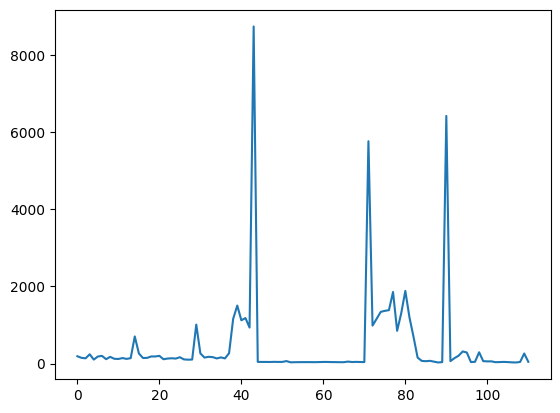

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import img_as_float
from skimage.exposure import histogram

# Function for computing the difference of histogram of an image and the previous one
def compute_hist(im, im_prev, hist_im_prev=None):

    [hist_r, bins_r]=histogram((img_as_float(im)[:,:,0]),64)
    [hist_g, bins_g]=histogram((img_as_float(im)[:,:,1]),64)
    [hist_b, bins_b]=histogram((img_as_float(im)[:,:,2]),64)
    hist_im = np.array(hist_r+hist_g+hist_b)
        
    if hist_im_prev is None:
        [hist_r, bins_r]=histogram((img_as_float(im_prev)[:,:,0]),64)
        [hist_g, bins_g]=histogram((img_as_float(im_prev)[:,:,1]),64)
        [hist_b, bins_b]=histogram((img_as_float(im_prev)[:,:,2]),64)
        hist_im_prev = np.array(hist_r+hist_g+hist_b)

    hist_diff = np.mean(np.abs(hist_im_prev - hist_im))
        
    return hist_diff, hist_im_prev


# initialize the data arrays 
xdata = []
ydata = []
prev_hist = None

%matplotlib inline

for t in range(len(ic)-1):
    # update the data plot
    y, prev_hist = compute_hist(ic[t+1], ic[t])#, hist_im_prev=prev_hist)
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis
    
fig, ax = plt.subplots(1)
plt.plot(xdata, ydata)

**Exercise:** Using the previous plot, define the threshold over the differences of histograms and use it to localize the first and final frames of every shot. Show the images in a single figure.
    

In [18]:
# Your solution here

## Background Subtraction:

When we want to segment images from a video we can use the Background subtraction algorithm. How dos it work?

Background Subtraction consists of extracting the background images (static) and removing the foreground (parts in movement)

    
Recall that the steps to follow are:
- Apply a median filter to all pixels along the temporal axis to estimate the background image (BI). (Why?!)
- Subtract BI from the current frame
- Large absolute values are interesting pixels


**Algorithm assumption:** We assume that:
- the foreground pixels change in time is dynamic.
- the background pixels change in time is static.

We read the video called 'epfl' from the [“EPFL” data set](https://www.epfl.ch/labs/cvlab/data/data-pom-index-php/).

In [15]:

#Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg 

ic = io.ImageCollection('images_notebook/epfl-sequence/*.png')
        # Reading a sequence of images from a folder

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*3]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=250, repeat= False)
plt.show()

<IPython.core.display.Javascript object>

We know that there is 240 frames in the sequence. 

Complete the following code to visualize the following Figure:

<img src="images/video-seg.png">




In [23]:
from skimage.filters import median
from skimage.color import rgb2gray

# Extract the background image using the median filter of the whole sequence:
ic_gray = [rgb2gray(img) for img in ic]
background = median(np.stack(ic_gray, axis=-1))

# Take the frame #20:
frame = ic[20]

# Define the foreground threshold:
foreground_threshold = 0.1

# Define the function to get the foreground image:
def get_foreground(frame, background, foreground_threshold):
    # Compute the absolute difference between the frame and the background:
    diff = np.abs(frame.astype(float) - background.astype(float))

    # Normalize the difference between 0 and 1:
    normalized_diff = diff / diff.max()

    # Threshold the normalized difference to obtain the foreground mask:
    foreground_mask = normalized_diff > foreground_threshold

    # Apply the foreground mask to the original frame:
    foreground = frame.copy()
    foreground[foreground_mask] = 255  # Set the foreground pixels to white (255)

    return foreground

# Apply the get_foreground function to obtain the foreground image:
foreground = get_foreground(frame, background, foreground_threshold)

# Show the original image, the background image, and the foreground image in a Figure:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(frame, cmap='gray')
axs[0].set_title('Original Frame')

axs[1].imshow(background, cmap='gray')
axs[1].set_title('Background')

axs[2].imshow(foreground, cmap='gray')
axs[2].set_title('Foreground')

plt.show()
    

ValueError: operands could not be broadcast together with shapes (540,960,3) (540,960,240) 

**Exercise:** Repeat the exercise for the frames 1, 50, 100, 120, 150, 220 and build a figure (6 rows x 3 columns) with the resulting original image, background image and foreground image of these 6 examples.

In [2]:
# Your solution here